**a. Measure the dispersion in both and interpret the results.**

In [1]:
import pandas as pd

In [8]:
import requests

df = pd.read_csv("data.csv")

In [9]:
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [10]:
from statistics import mean, median, mode, stdev

In [11]:
df.shape

(100, 3)

In [12]:
import statistics as st

In [17]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [19]:
df1 = df[' Blood Pressure Before (mmHg)']

In [21]:
df2 = df[' Blood Pressure After (mmHg)']

In [ ]:
st

median calculation for Blood pressure before

In [23]:
st.median(df1)

135.0

Mean calculation for Blood pressure after

In [24]:
st.median(df2)

128.0

Variance calculation

In [25]:
st.variance(df1)

43.53727272727273

In [26]:
st.variance(df2)

47.444848484848485

Population Variance

In [39]:
def var_population(x):
    var_pop = st.variance(x)*((len(x)-1)/len(x))
    return var_pop

print(var_population(df1))
print(var_population(df2))

43.1019
46.9704


the population variance is slightly less than the sample variance

In [27]:
st.stdev(df1)

6.598278012275076

In [29]:
st.stdev(df2)

6.888022102523226

A low coefficient of variation indicates the values are not very widely dispersed, but a higher value indicates a greater dispersion of the sample.

In [30]:
df.skew()

Patient ID                       0.000000
 Blood Pressure Before (mmHg)    0.144983
 Blood Pressure After (mmHg)     0.267724
dtype: float64

In [34]:
import seaborn as sns
import matplotlib as plt

The distribution is symmetric

D:\ineuron\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'matplotlib' has no attribute 'show'

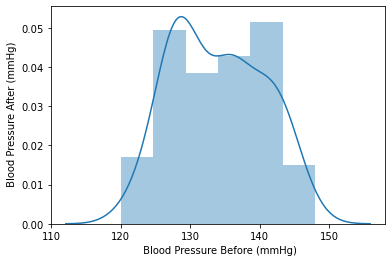

In [38]:
#fig = plt.figure(figsize=(12, 4))
ax = sns.distplot(df[' Blood Pressure Before (mmHg)'].dropna())
ax.set_ylabel(' Blood Pressure After (mmHg)')
ax.set_xlabel(' Blood Pressure Before (mmHg)')
plt.show()

**b. Calculate mean and 5% confidence interval and plot it in a graph**

Mean calculation for Blood pressure before

In [43]:
st.mean(df1)

133.91

Mean calculation for Blood pressure after

In [44]:
st.mean(df2)

128.36

In [45]:
from scipy.stats import t

Calculate Confidence Intervals

In [47]:
m = df1.mean() 
s = df1.std() 
dof = len(df1)-1 
confidence = 0.95

In [50]:
m = df2.mean() 
s = df2.std() 
doff = len(df2)-1 
confidence = 0.95

We now need the value of t. The function that calculates the inverse cumulative distribution is ppf. We need to apply the absolute value because the cumulative distribution works with the left tail, so the result would be negative.

In [49]:
t_crit = np.abs(t.ppf((1-confidence)/2,dof))

In [51]:
t_crit = np.abs(t.ppf((1-confidence)/2,doff))

In [52]:
(m-s*t_crit/np.sqrt(len(df1)), m+s*t_crit/np.sqrt(len(df1)))

(126.99326697818071, 129.7267330218193)

In [53]:
(m-s*t_crit/np.sqrt(len(df2)), m+s*t_crit/np.sqrt(len(df2)))

(126.99326697818071, 129.7267330218193)

In [55]:
values = [np.random.choice(df1,size=len(df1),replace=True).mean() for i in range(1000)] 
np.percentile(values,[100*(1-confidence)/2,100*(1-(1-confidence)/2)]) 

array([132.69  , 135.1205])

**c. Calculate the Mean absolute deviation and Standard deviation and interpret
the results.**

In [56]:
import numpy as np

std_x = np.sqrt(st.variance(df1))
print("Standard Deviation of Sample:",std_x)

#calculate the Standard deviation of population
std_pop = np.sqrt(var_population(df1))
print("Standard Deviation of population:", std_pop)

Standard Deviation of Sample: 6.598278012275076
Standard Deviation of population: 6.56520372875054


In [57]:
std_x = np.sqrt(st.variance(df2))
print("Standard Deviation of Sample:",std_x)

#calculate the Standard deviation of population
std_pop = np.sqrt(var_population(df2))
print("Standard Deviation of population:", std_pop)

Standard Deviation of Sample: 6.888022102523226
Standard Deviation of population: 6.853495458523336


**d. Calculate the correlation coefficient and check the significance of it at 1% level
of significance.**

In [58]:
from pydoc import help
from scipy.stats.stats import pearsonr
help(pearsonr)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_148\1834757306.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Help on function pearsonr in module scipy.stats._stats_py:

pearsonr(x, y, *, alternative='two-sided')
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that

In [61]:
pearsonr(df1, df2)

PearsonRResult(statistic=0.9779485966556021, pvalue=1.8097381433059864e-68)

Since the correlation coefficient is close to 1, this tells us that there is a strong positive association between the two variables.

And since the corresponding p-value is less than .05, we conclude that there is a statistically significant association between the two variables.

In [63]:
import scipy.stats
scipy.stats.pearsonr(df1, df2) 

PearsonRResult(statistic=0.9779485966556021, pvalue=1.8097381433059864e-68)

In [65]:
import matplotlib.pyplot as plt

In [67]:
slope, intercept, r, p, stderr = scipy.stats.linregress(df1, df2)

In [69]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

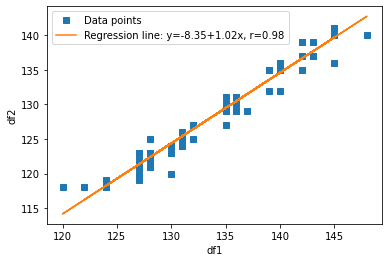

In [70]:
fig, ax = plt.subplots()
ax.plot(df1, df2, linewidth=0, marker='s', label='Data points')
ax.plot(df1, intercept + slope * df1, label=line)
ax.set_xlabel('df1')
ax.set_ylabel('df2')
ax.legend(facecolor='white')
plt.show()